<a href="https://colab.research.google.com/github/MeenTers/data_viz/blob/main/Visualize_Data_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os
from datetime import datetime as dt
from datetime import time
from matplotlib import pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/My Drive/data_viz'

In [4]:
data = pd.read_csv(os.path.join(path,'search_request.csv'))
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
0,0,683de889-f923-494e-9d46-44a3d67b7259,2018-06-14 12:34:35.449,"Wongnai/8.17.3 rv:8.17.3.3921 (iPhone5,4; iOS;...",NaN,NaN,5lqjjikta19d296mo7g2h1k86p,18,12.6347,101.463
1,1,4a811230-ffa4-4631-a4c8-5d0394137d02,2018-06-14 17:11:19.469,Mozilla/5.0 (iPhone; CPU iPhone OS 11_4 like M...,NaN,NaN,1r3iotmp0o9slom91stdt9vivc,10,14.8009,102.534
2,2,7ad6ee8e-438e-4bea-9183-74dcef9e358e,2018-06-14 13:22:31.736,Mozilla/5.0 (Linux; Android 7.0; SAMSUNG SM-J7...,NaN,NaN,5ci1eo4v5u9dha4ppgu94ue7p6,8,13.7383,100.371
3,3,0c17a5f5-fa89-40f4-ae94-a8659268f827,2018-06-02 12:37:27.331,Mozilla/5.0 (Linux; Android 7.1.1; SM-N950F Bu...,NaN,NaN,39n535qgje9kpojp0grhfj8umk,12,12.6669,101.861
4,4,6870dc3a-5602-44fc-80ed-df0a7783df9d,2018-06-02 11:19:22.404,Mozilla/5.0 (iPhone; CPU iPhone OS 11_3_1 like...,NaN,NaN,5pa03h6lj691to60erver1l8o4,14,12.2372,99.88


## เตรียมข้อมูล

### แปลงข้อมูลบอกเวลาให้เป็นตัวแปร datetime

In [5]:
data['search_timestamp']  = pd.to_datetime(data['search_timestamp'],format='%Y-%m-%d %H:%M:%S',errors='coerce')

## Bar chart(กราฟแท่ง)

ส่วนประกอบกราฟแท่ง

*   ตัวกราฟแท่ง(height)
*   ตำแหน่งกราฟแท่ง (x)
*   ชื่อแท่ง (tick_label)
*   ชื่อกราฟ (plt.title)
*   ชื่อแกนx (plt.xlabel)
*   ชื่อแกนY (plt.ylabel)



### สร้างกราฟแท่งเปรียบเทียบปริมาณคนเข้าใช้ Web Wongnai.com เพื่อคนหาร้านอาหารในแต่ละวัน

### การแสดงชื่อกราฟให้เป็นภาษาไทย [link text](https://medium.com/@kanyawee.work/%E0%B9%81%E0%B8%AA%E0%B8%94%E0%B8%87%E0%B8%9C%E0%B8%A5%E0%B8%A0%E0%B8%B2%E0%B8%A9%E0%B8%B2%E0%B9%84%E0%B8%97%E0%B8%A2%E0%B9%83%E0%B8%99%E0%B8%81%E0%B8%A3%E0%B8%B2%E0%B8%9F%E0%B8%82%E0%B8%AD%E0%B8%87-matplotlib-%E0%B8%9A%E0%B8%99-google-colab-37210d9a9f31)

In [6]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [7]:
# !pip install -U --pre matplotlib  
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

Text(0.5, 1.0, 'ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน')

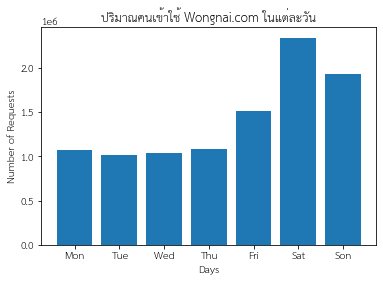

In [8]:
plt.bar([1,2,3,4,5,6,7],[data[data['search_timestamp'].dt.dayofweek == 0].shape[0]
                      , data[data['search_timestamp'].dt.dayofweek == 1].shape[0]
                      , data[data['search_timestamp'].dt.dayofweek == 2].shape[0]
                      , data[data['search_timestamp'].dt.dayofweek == 3].shape[0]
                      ,  data[data['search_timestamp'].dt.dayofweek == 4].shape[0]
                      ,  data[data['search_timestamp'].dt.dayofweek == 5].shape[0]
                      ,  data[data['search_timestamp'].dt.dayofweek == 6].shape[0]
                      ], tick_label = ['Mon','Tue','Wed','Thu','Fri','Sat','Son']);
plt.xlabel('Days')
plt.ylabel('Number of Requests')
plt.title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน')

## Grouped Bar chart

### แสดงปริมาณคนเข้าเว็บแต่ละวันโดยเปรียบเทียบช่วงเวลา 11.00 - 12.00 น. กับ 23.00 - 0.00น.

In [9]:
data[(data['search_timestamp'].dt.dayofweek == 0) 
& (data['search_timestamp'].dt.time < time(hour=12)) 
& (data['search_timestamp'].dt.time >= time(hour=11))].shape[0]

73249

In [10]:
lunch = [data[(data['search_timestamp'].dt.dayofweek == 0) & (data['search_timestamp'].dt.time < time(hour=12)) & (data['search_timestamp'].dt.time >= time(hour=11))].shape[0]
          ,data[(data['search_timestamp'].dt.dayofweek == 1) & (data['search_timestamp'].dt.time < time(hour=12)) & (data['search_timestamp'].dt.time >= time(hour=11))].shape[0]
          ,data[(data['search_timestamp'].dt.dayofweek == 2) & (data['search_timestamp'].dt.time < time(hour=12)) & (data['search_timestamp'].dt.time >= time(hour=11))].shape[0]
          ,data[(data['search_timestamp'].dt.dayofweek == 3) & (data['search_timestamp'].dt.time < time(hour=12)) & (data['search_timestamp'].dt.time >= time(hour=11))].shape[0]
          ,data[(data['search_timestamp'].dt.dayofweek == 4) & (data['search_timestamp'].dt.time < time(hour=12)) & (data['search_timestamp'].dt.time >= time(hour=11))].shape[0]
          ,data[(data['search_timestamp'].dt.dayofweek == 5) & (data['search_timestamp'].dt.time < time(hour=12)) & (data['search_timestamp'].dt.time >= time(hour=11))].shape[0]
          ,data[(data['search_timestamp'].dt.dayofweek == 6) & (data['search_timestamp'].dt.time < time(hour=12)) & (data['search_timestamp'].dt.time >= time(hour=11))].shape[0]]
lunch       

[73249, 73083, 75429, 78024, 99007, 174165, 165440]

In [11]:
midnight = [data[(data['search_timestamp'].dt.dayofweek == 0) & (data['search_timestamp'].dt.time >= time(hour=23))].shape[0]
        ,data[(data['search_timestamp'].dt.dayofweek == 1) & (data['search_timestamp'].dt.time >= time(hour=23))].shape[0]
        ,data[(data['search_timestamp'].dt.dayofweek == 2) & (data['search_timestamp'].dt.time >= time(hour=23))].shape[0]
        ,data[(data['search_timestamp'].dt.dayofweek == 3) & (data['search_timestamp'].dt.time >= time(hour=23))].shape[0]
        ,data[(data['search_timestamp'].dt.dayofweek == 4) & (data['search_timestamp'].dt.time >= time(hour=23))].shape[0]
        ,data[(data['search_timestamp'].dt.dayofweek == 5) & (data['search_timestamp'].dt.time >= time(hour=23))].shape[0]
        ,data[(data['search_timestamp'].dt.dayofweek == 6) & (data['search_timestamp'].dt.time >= time(hour=23))].shape[0]]
midnight

[31874, 32258, 31153, 35944, 53174, 58306, 35801]

In [12]:
labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Son']

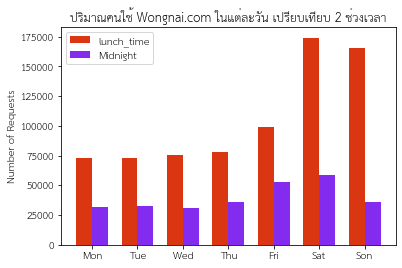

In [13]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, lunch, width, label='lunch_time', color='#d93611')
rects2 = ax.bar(x + width/2,midnight, width, label='Midnight', color = '#842bf0')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Requests')
ax.set_title('ปริมาณคนใช้ Wongnai.com ในแต่ละวัน เปรียบเทียบ 2 ช่วงเวลา')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

## Stack bar chart

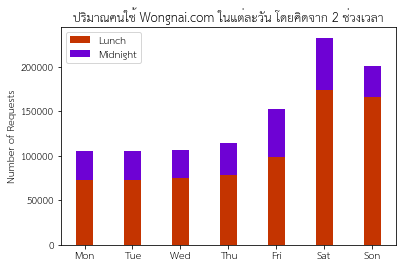

In [14]:
labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Son']

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, lunch, width, label='Lunch',color='#c43400')
ax.bar(labels, midnight, width,label='Midnight',bottom= lunch,color= '#6e02d4')

ax.set_ylabel('Number of Requests')
ax.set_title('ปริมาณคนใช้ Wongnai.com ในแต่ละวัน โดยคิดจาก 2 ช่วงเวลา')
ax.legend()
plt.show()

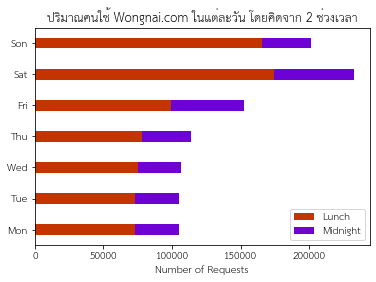

In [15]:
labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Son']

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.barh(labels, lunch, width, label='Lunch',color='#c43400')
ax.barh(labels, midnight, width,label='Midnight',left= lunch,color= '#6e02d4')

ax.set_xlabel('Number of Requests')
ax.set_title('ปริมาณคนใช้ Wongnai.com ในแต่ละวัน โดยคิดจาก 2 ช่วงเวลา')
ax.legend()
plt.show()

## เช็คชื่อ โดยให้วาด Bar chart ที่เปรียบเทียบปริมาณคนใช้งาน Wongnai.com สองช่วงเวลา โดยให้กราฟแสดงสัดส่วนของปริมาณคนใช้งานในแต่ละวันด้วย

In [16]:
new_labels = ['Lunch','Midnight']

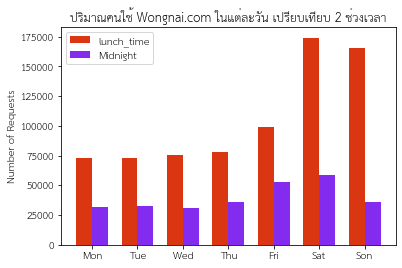

In [17]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, lunch, width, label='lunch_time', color='#d93611')
rects2 = ax.bar(x + width/2,midnight, width, label='Midnight', color = '#842bf0')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Requests')
ax.set_title('ปริมาณคนใช้ Wongnai.com ในแต่ละวัน เปรียบเทียบ 2 ช่วงเวลา')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

## Histogram

In [18]:
# Fixing random state for reproducibility
np.random.seed(2021)

In [19]:
np.random.randint(100)

85

In [20]:
np.random.randn(100) #mu=0 std=1

array([-0.65278343,  0.42193173, -0.17383896, -0.20136597,  0.77039766,
        1.20160669, -0.19009954,  0.13407709, -0.75051215,  0.21162099,
        2.0448903 ,  1.07526774,  0.07902026,  0.49328237, -0.79136747,
       -2.13059519,  0.31720629, -1.36461749,  0.35842752, -1.30562426,
        2.02071843, -2.68680391,  0.55787157,  0.77617621,  0.20264991,
       -0.50735635,  1.05898217,  0.46323535,  0.49699852, -1.25014539,
       -1.51195802,  0.89457475,  0.24281041,  1.00678612, -0.04124402,
        0.34396583,  0.02548591, -1.07844433,  0.81565795, -0.13376737,
        0.61319221,  0.32808139,  1.7748439 ,  1.15295013,  1.02961911,
       -0.50175762, -1.09042286, -1.10397942, -0.64776684, -0.82386881,
       -0.97420544,  0.42570077,  1.59288883, -1.2010321 , -1.76059321,
       -0.8979381 , -0.21097685,  1.78542198,  0.31632373,  0.42776574,
        1.32762063,  0.42865209, -0.80177471, -1.40404436,  0.4366976 ,
        0.86278299, -0.48927924,  1.50419932, -1.05216008, -1.47

In [21]:
mu, sigma =100,15
X = mu + sigma * np.random.randn(10000)

In [22]:
X

array([106.27297175, 105.18679309,  87.6298573 , ..., 104.93498539,
        90.71739267,  98.11272785])

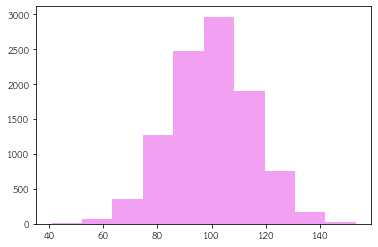

In [23]:
output = plt.hist(X,10,facecolor = 'violet',alpha=0.75);

In [24]:
output

(array([  13.,   70.,  351., 1270., 2478., 2967., 1897.,  753.,  172.,
          29.]), array([ 40.88463603,  52.13062451,  63.376613  ,  74.62260148,
         85.86858997,  97.11457845, 108.36056694, 119.60655543,
        130.85254391, 142.0985324 , 153.34452088]), <a list of 10 Patch objects>)

## Plot Histogram ของ number of result

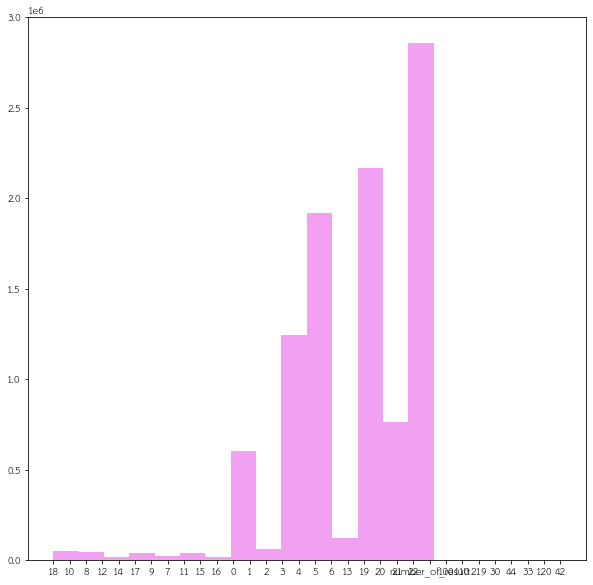

In [25]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[10,10]
output1 = plt.hist(list(data['number_of_result']),20,facecolor = 'violet',alpha=0.75);

In [27]:
data.dtypes

Unnamed: 0                   int64
search_id                   object
search_timestamp    datetime64[ns]
user_agent                  object
q                           object
user_id                    float64
session_id                  object
number_of_result            object
lat                         object
long                        object
dtype: object

### เรียกดู data type ของตัวแปร

In [28]:
type(data['number_of_result'][0])

int

### ตรวจสอบ data type ของตัวแปร


In [29]:
type(data['number_of_result'][0]) == int

True

### ตรวจสอบดูทุกๆค่าใน column 'number of result'

In [35]:
#for x in data['number_of_result'] :
#   if type(x) != int:
#       print(f'ข้อมูล{x} -> {type(x)}')

### ลบ record ที่มีค่าใน column 'number of result' เป็น number of result

In [38]:
data[data['number_of_result'] == 'number_of_result']

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
1000016,1000032,search_id,NaT,user_agent,original_q,228667.0,session_id,number_of_result,lat,long


In [39]:
data.drop(1000016,inplace=True)

In [40]:
data[data['number_of_result'] == 'number_of_result']

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long


In [59]:
new_type = data['number_of_result'].astype('int32')

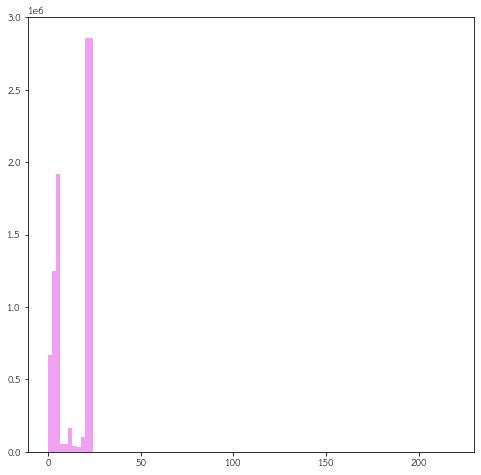

In [56]:
output2 = plt.hist(new_type,100,facecolor = 'violet',alpha=0.75)

## ลบ Outlier

In [52]:
new_type_nooutlier = new_type[new_type < 25]

In [53]:
new_type.shape[0] - new_type_nooutlier.shape[0]

14

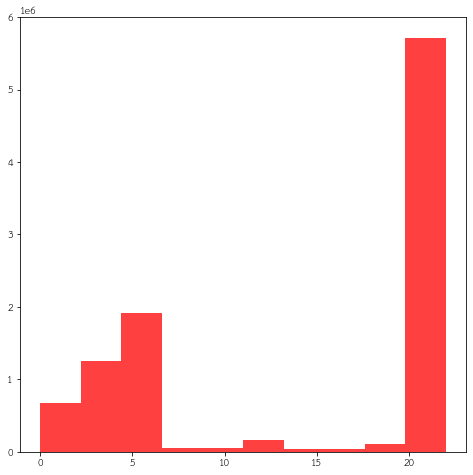

In [60]:
matplotlib.rcParams['figure.figsize']=[8,8]
output2 = plt.hist(new_type_nooutlier,10,facecolor = 'red',alpha=0.75);

Quiz 7 เปรียบเทียบความถี่ของแท่งที่มีค่ามากที่สุด กับ แท่งอื่นๆรวมกัน

In [62]:
data_q7 = new_type[new_type < 20]

In [77]:
data_q7.count()

4287104

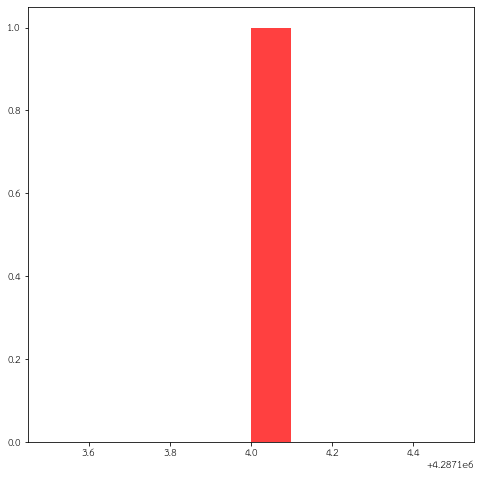

In [78]:
plt.hist(data_q7.count(),10,facecolor = 'red',alpha=0.75);

In [79]:
data_q7_1 = new_type[new_type == 20]

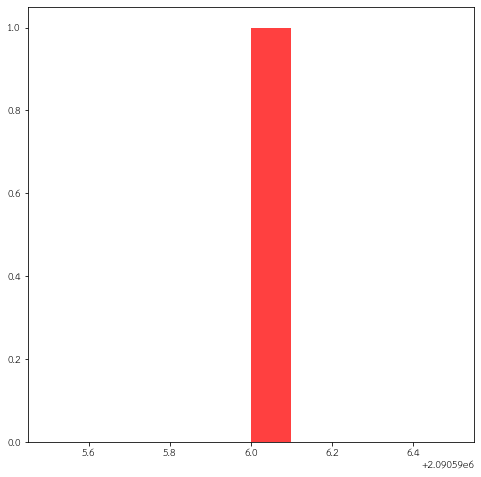

In [80]:
plt.hist(data_q7_1.count(),10,facecolor = 'red',alpha=0.75);